In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [6]:
countries = pd.read_csv("Data/countries of the world.csv")

In [54]:
death_rates_smoking_age = pd.read_csv("Data/death_rates_smoking_age.csv")

In [10]:
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [34]:
GDP = countries[["Country","GDP ($ per capita)"]].copy()

In [35]:
import pickle

In [36]:
convCountry2Code = pickle.load(open("Data/countryToCode.pkl","rb"))

In [37]:
GDP["Country"] = GDP["Country"].str.strip()

In [38]:
convCountry2Code.update({"Anguilla":"AIA"})

In [39]:
GDP["Code"] = GDP["Country"].apply(lambda x: convCountry2Code[x] if x in convCountry2Code else "")

In [52]:
GDP = GDP[["Code","GDP ($ per capita)"]]

In [56]:
death_rates_smoking_age = death_rates_smoking_age[["Code","Year","All_ages"]]

In [57]:
death_rates_smoking_age = death_rates_smoking_age.pivot_table("All_ages",["Code"],"Year")

In [58]:
death_rates_smoking_age["avg"]  = death_rates_smoking_age.mean(axis=1)

In [59]:
death_rates_smoking_age.columns = ["deathRate_"+str(x) for x in death_rates_smoking_age.columns]

,Code,deathRate_1990,deathRate_1991,deathRate_1992,deathRate_1993,deathRate_1994,deathRate_1995,deathRate_1996,deathRate_1997,deathRate_1998,...,deathRate_2009,deathRate_2010,deathRate_2011,deathRate_2012,deathRate_2013,deathRate_2014,deathRate_2015,deathRate_2016,deathRate_2017,deathRate_avg
0,AFG,63.895905,61.846347,53.436511,47.044347,45.799808,44.109036,42.616425,41.579362,40.860275,...,31.247881,30.217384,29.381074,28.781991,28.220176,27.932338,28.022238,28.089774,28.127580,38.164768
1,AGO,55.336126,54.801691,54.408293,54.548736,54.350016,53.309461,51.136809,49.881300,51.131919,...,37.483408,36.474249,35.738155,35.259244,34.368768,32.861465,32.254396,31.642266,31.241130,43.738552
2,ALB,74.382434,77.920510,76.411919,74.282222,71.288005,73.440844,78.489728,82.127025,79.656276,...,111.709564,115.427724,120.979960,125.819761,131.187072,138.039816,142.594122,146.334116,150.430709,102.009951
3,AND,93.263925,90.882328,92.000151,92.692981,95.420198,97.005635,96.703684,96.117648,96.124110,...,96.511500,97.479604,94.942909,94.117218,95.583268,96.203202,96.668713,98.398278,99.682713,95.704627
4,ARE,14.665647,15.020761,15.390174,15.793874,16.180918,16.545835,16.628807,16.636072,16.878859,...,11.091580,12.190815,13.568159,15.153034,16.899626,18.850733,20.952964,23.309480,25.815678,16.368323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,WSM,75.035643,75.388561,76.085998,76.470094,77.398664,78.205475,79.713423,79.546347,79.401109,...,83.451667,83.799083,84.419556,85.233666,85.914899,86.721893,87.662583,88.713239,89.826213,81.374341
192,YEM,51.297551,50.484856,49.962191,49.534796,49.099109,48.579422,48.038072,47.483146,46.797839,...,40.246683,39.816276,39.717770,39.648357,39.615008,39.668574,40.098227,40.632389,41.227174,44.052553
193,ZAF,76.176405,76.320858,77.521622,76.440371,79.258249,80.497273,88.541623,97.014771,99.182676,...,79.872171,74.751062,69.731238,65.676539,62.209338,59.963270,58.783959,57.704270,54.446049,81.575526
194,ZMB,37.879420,39.128417,40.367554,41.620449,42.820869,43.914936,44.364940,44.249203,43.954032,...,30.400465,29.980878,29.252326,28.394816,27.578072,26.831008,26.164978,25.600125,25.071954,35.539675


In [70]:
A = GDP[["Code","GDP ($ per capita)"]].copy()

In [71]:
B = death_rates_smoking_age.reset_index()[["Code","deathRate_avg"]].copy()

In [80]:
cbd = pd.merge(B,A,how="inner")

In [82]:
cbd

,Code,deathRate_avg,GDP ($ per capita)
0,AFG,38.164768,700.0
1,AGO,43.738552,1900.0
2,ALB,102.009951,4500.0
3,AND,95.704627,19000.0
4,ARE,16.368323,23200.0
...,...,...,...
168,WSM,81.374341,5600.0
169,YEM,44.052553,800.0
170,ZAF,81.575526,10700.0
171,ZMB,35.539675,800.0


<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='deathRate_avg'>

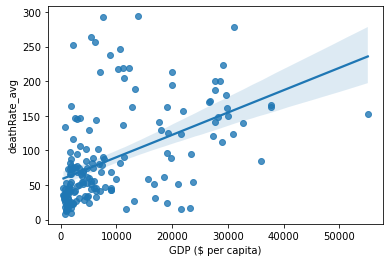

In [83]:
sns.regplot(data=cbd,x ="GDP ($ per capita)", y= "deathRate_avg")